In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test= train_test_split(df,test_size=0.2,random_state=17)

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [5]:
X_train = min_max_scaler.fit_transform(X_train)

In [6]:
X_train

array([[0.11764706, 0.50753769, 0.50877193, ..., 0.23811639, 0.03333333,
        0.        ],
       [0.11764706, 0.48241206, 0.59649123, ..., 0.25277654, 0.08333333,
        0.        ],
       [0.52941176, 0.53266332, 0.45614035, ..., 0.13416259, 0.35      ,
        0.        ],
       ...,
       [0.58823529, 0.54271357, 0.57894737, ..., 0.08618392, 0.35      ,
        1.        ],
       [0.23529412, 0.45728643, 0.61403509, ..., 0.1634829 , 0.01666667,
        0.        ],
       [0.        , 0.47236181, 0.61403509, ..., 0.11950244, 0.        ,
        0.        ]])

In [11]:
from sklearn.cluster import KMeans
no_of_cluster = [1,2,3,4,5,6,7]
wss = []

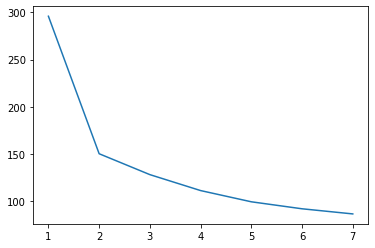

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for k in no_of_cluster:
    k_means = KMeans(n_clusters=k)
    k_means.fit_predict(X_train)
    wss.append(k_means.inertia_)
plt.plot(no_of_cluster,wss)
plt.show()

In [13]:
X_test = min_max_scaler.transform(X_test)

In [16]:
k_means = KMeans(n_clusters=5)
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
predict = k_means.predict(X_test)

In [18]:
predict

array([3, 1, 3, 3, 3, 0, 2, 4, 1, 4, 0, 1, 3, 0, 3, 1, 4, 2, 0, 1, 4, 3,
       3, 1, 2, 3, 1, 2, 1, 2, 0, 3, 3, 2, 2, 2, 1, 1, 3, 4, 3, 3, 0, 4,
       3, 2, 1, 1, 2, 2, 4, 3, 1, 0, 1, 0, 4, 3, 1, 0, 1, 3, 2, 2, 3, 3,
       3, 3, 0, 2, 1, 3, 1, 3, 3, 4, 3, 4, 3, 1, 1, 1, 2, 3, 0, 1, 1, 3,
       3, 2, 3, 3, 0, 3, 3, 4, 2, 2, 4, 2, 1, 1, 1, 1, 3, 0, 1, 4, 3, 1,
       3, 4, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 0, 0, 1, 3, 3, 3, 2, 2, 0,
       3, 1, 3, 1, 2, 3, 4, 2, 1, 1, 1, 3, 1, 3, 3, 3, 1, 0, 2, 1, 2, 2])

In [19]:
k_means.transform(X_test)

array([[0.71673831, 1.13619523, 0.34876503, 0.31530185, 1.17985776],
       [1.11438679, 0.4127559 , 1.17607996, 1.29606719, 0.70276894],
       [0.38049939, 1.19330847, 0.63986287, 0.28768126, 1.02586664],
       [0.70721045, 1.15111622, 0.3962084 , 0.28896419, 1.1747252 ],
       [0.67758039, 1.10168402, 0.39910802, 0.39395113, 1.1468124 ],
       [0.24668894, 1.21615087, 0.76872964, 0.60469539, 1.04597988],
       [0.72962251, 1.09033389, 0.298731  , 0.4223832 , 1.19888109],
       [1.36568956, 0.9403014 , 1.36807901, 1.21866334, 0.72012924],
       [1.26079721, 0.49039827, 1.182774  , 1.37922095, 0.9023445 ],
       [1.35564557, 0.93071778, 1.34767123, 1.20940097, 0.70911616],
       [0.39253739, 1.28624567, 0.92982381, 0.79655395, 1.10894204],
       [1.19355099, 0.52622195, 1.19564884, 1.34781524, 0.82521319],
       [0.61165097, 1.08862928, 0.30021296, 0.25960123, 1.12997447],
       [0.60928864, 1.154633  , 0.6607823 , 0.87161089, 1.2958305 ],
       [0.70244626, 1.174678  , 0.